In [78]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

import os
import ntpath
import zipfile



import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2019-04-12 09:32:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.215.112, 2a00:1450:401b:807::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.215.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  4.28MB/s    in 15s     

2019-04-12 09:32:36 (4.27 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [15]:
cwd = os.getcwd()

local_zip = os.path.join(cwd, 'cats_and_dogs_filtered.zip')
zip_ = zipfile.ZipFile( local_zip )
zip_.extractall()

In [25]:
train_dir = os.path.join(cwd, 'cats_and_dogs_filtered', 'train')
validation_dir = os.path.join(cwd, 'cats_and_dogs_filtered', 'validation')

paths = {
    ('train','cats'): os.path.join(train_dir, 'cats'),
    ('train','dogs'): os.path.join(train_dir, 'dogs'),
    ('validation','cats'): os.path.join(validation_dir, 'cats'),
    ('validation','dogs'): os.path.join(validation_dir, 'dogs')
}

paths[('validation', 'dogs')]

'/data/notebooks/Challenge02/day05/cats_and_dogs_filtered/validation/dogs'

In [31]:
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

In [37]:
all_cat_files = listdir_fullpath(paths[('train', 'cats')])
all_dog_files = listdir_fullpath(paths[('train', 'dogs')])


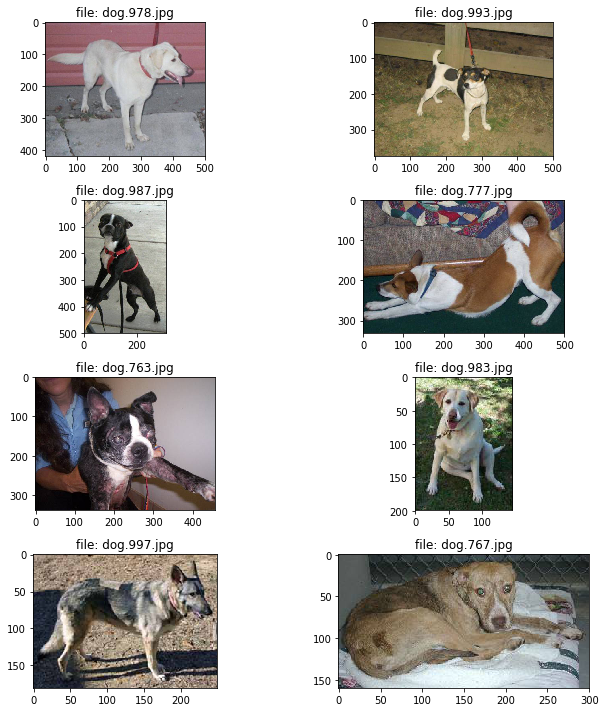

In [70]:
def plot_list_images( img_file_list, lines, cols ):
    plt.figure(figsize=(10,10))

    for idx, file in enumerate(img_file_list):
        plt.subplot( lines, cols, idx+1 )
        img = mpimage.imread(file)
        plt.imshow(img)
        plt.title('file: {}'.format(ntpath.basename(file)))

    plt.tight_layout()
    

def plot_dir_images( img_dir, startAt, lines, cols ):
    plot_list_images( listdir_fullpath(img_dir)[startAt:startAt+lines*cols], lines, cols)
    
plot_dir_images( paths[('train', 'dogs')], 109, 4, 2 )


In [89]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape ),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)             0         
__________

In [83]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [87]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [90]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/1
 - 77s - loss: 0.6967 - acc: 0.5035 - val_loss: 0.6925 - val_acc: 0.4930
